Train on 25596 samples, validate on 5000 samples
Epoch 1/20
25596/25596 [==============================] - 2s 71us/step - loss: 1.3573 - acc: 0.4982 - val_loss: 0.8930 - val_acc: 0.7078
Epoch 2/20
25596/25596 [==============================] - 2s 62us/step - loss: 0.6755 - acc: 0.9251 - val_loss: 0.4736 - val_acc: 0.9626
Epoch 3/20
25596/25596 [==============================] - 2s 62us/step - loss: 0.3600 - acc: 0.9721 - val_loss: 0.2858 - val_acc: 0.9714
Epoch 4/20
25596/25596 [==============================] - 2s 63us/step - loss: 0.2215 - acc: 0.9786 - val_loss: 0.2006 - val_acc: 0.9740
Epoch 5/20
25596/25596 [==============================] - 2s 62us/step - loss: 0.1452 - acc: 0.9830 - val_loss: 0.1462 - val_acc: 0.9774
Epoch 6/20
25596/25596 [==============================] - 2s 62us/step - loss: 0.0952 - acc: 0.9869 - val_loss: 0.1157 - val_acc: 0.9778
Epoch 7/20
25596/25596 [==============================] - 2s 63us/step - loss: 0.0648 - acc: 0.9896 - val_loss: 0.0988 - val_acc:

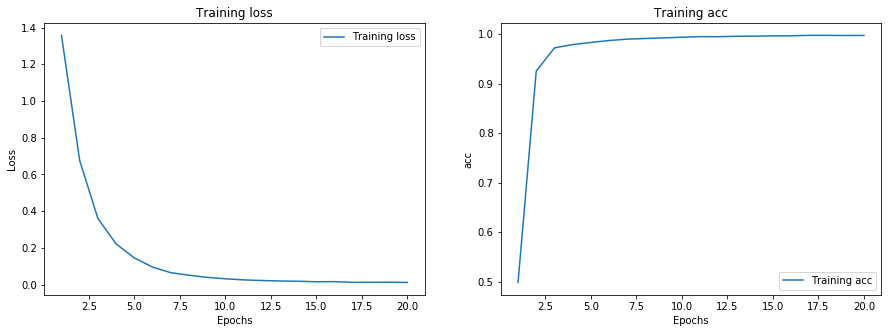

5139/5139 [==============================] - 0s 26us/step
[0.0887400123585573, 0.9883245768470972]


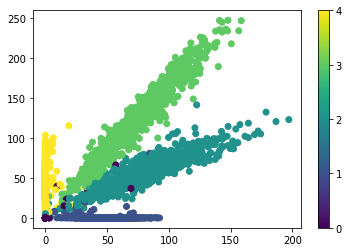

In [2]:
# -*- coding: utf-8 -*-
"""FeatureExtractionMNIST.ipynb
Automatically generated by Colaboratory.
Original file is located at
    https://colab.research.google.com/drive/16M5-8wW-pKPkvgjK0OOe87NRgXCa2vla
"""

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.layers.core import Dense, Activation, Reshape
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def prepare_data():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  img_rows = x_train.shape[1]
  img_cols = x_train.shape[2]
  input_shape = (img_rows, img_cols, 1)

  x_train = x_train.reshape(-1, img_rows, img_cols, 1)
  x_test = x_test.reshape(-1, img_rows, img_cols, 1)
  x_train = x_train.astype("float32")
  x_test = x_test.astype("float32")
  x_train /= 255
  x_test /= 255
  return x_train, y_train, x_test, y_test

def prepare_partial_data(x_train, y_train):
  index0_4 = y_train<5
  x_train_04 = x_train[index0_4]
  y_train_04 = y_train[index0_4]
  x_train_59 = x_train[np.invert(index0_4)]
  y_train_59 = y_train[np.invert(index0_4)]
  return x_train_04, y_train_04, x_train_59, y_train_59

def plot_history(history, with_val = False):
  history_dict = history.history
  loss_values = history_dict['loss']
  if with_val:
    val_loss_values = history_dict['val_loss']
  epochs = range(1, len(loss_values) + 1)
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss_values, label='Training loss')
  if with_val:
    plt.plot(epochs, val_loss_values, label='Validation loss')
  plt.title('Training loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  acc = history_dict['acc']
  if with_val:
    val_acc = history_dict['val_acc']
  plt.subplot(1,2,2)
  plt.plot(epochs, acc, label='Training acc')
  if with_val:
    plt.plot(epochs, val_acc, label='Validation acc')
  plt.title('Training acc')
  plt.xlabel('Epochs')
  plt.ylabel('acc')
  plt.legend()
  
  plt.show()

def get_dense_model():
  model = Sequential()
  model.add(Reshape((28*28,)))
  model.add(Dense(128, input_shape=(None, 28*28), activation = 'relu', use_bias=True))
  model.add(Dense(128, activation = 'relu', use_bias=True))
  model.add(Dense(2, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

def train_model(model, x_train, y_train, x_val, y_val):
  epochs = 20
  y_train_cato = to_categorical(y_train, 10)
  y_val_cato = to_categorical(y_val,10)
  history = model.fit(x_train, y_train_cato, verbose=1, batch_size=64,  epochs=epochs, validation_data=(x_val, y_val_cato))
  plot_history(history)
  return model

def get_feature_model(model):
  feature_model = Model(inputs=model.input, outputs=model.layers[-2].output)
  return feature_model

def get_feature(model, data):
  features = model.predict(data)
  return features

def plot_scatter_cato(features, labels, list_active_labels):
  fig, ax = plt.subplots()
  ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
  for i in list_active_labels:
    index = [labels[:,i]==1]
    ax.plot(features[index][0], features[index][1], marker='o', linestyle='', ms=12, label=i)
  ax.legend()
  plt.show()

def plot_scatter3d_cato(features, labels, list_active_labels):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
  for i in list_active_labels:
    index = [labels[:,i]==1]
    ax.plot(features[index][0], features[index][1], features[index][2], marker='o', linestyle='', ms=12, label=i)
  ax.legend()
  plt.show()

def scatter_all(features, labels):
  plt.scatter(features[:,0], features[:,1], c=labels)
  plt.colorbar(ticks=range(10))
  plt.show()

def scatter3d_all(features, labels):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.scatter(features[:,0], features[:,1], features[:,2], c=labels)
  plt.colorbar(ticks=range(10))
  plt.show()


# get data
x_train, y_train, x_test, y_test = prepare_data()
x_train_04, y_train_04, x_train_59, y_train_59 = prepare_partial_data(x_train, y_train)
x_test_04, y_test_04, x_test_59, y_test_59 = prepare_partial_data(x_test, y_test)

x_04_val = x_train_04[:5000]
x_train_04 = x_train_04[5000:]
y_04_val = y_train_04[:5000]
y_train_04 = y_train_04[5000:]

# get and train model
model = get_dense_model()
model = train_model(model, x_train_04, y_train_04, x_04_val, y_04_val)
# model evaluation
y_test_cato = to_categorical(y_test_04, 10)
print(model.evaluate(x_test_04, y_test_cato))
# plot features
f_model = get_feature_model(model)
features = get_feature(f_model, x_test_04)
scatter_all(features, y_test_04)